<a href="https://colab.research.google.com/github/lrochaqu/nyu-python-public-policy/blob/master/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 7
hypotheses: 

- How does the number of seniors in a CD correlates with the number of compaints related to Home delivered meals in the community district. 

- How does the number of Home delivered meals complaints correlates with the poverty rate in community district.  

For the purpose of this assigment I will compare the following variables: 
- 311 data set: 'Home Delivered Meal - Missed Delivery' and 'Home Delivered Meal Complaint'
- Community districts profiles data set: Percentage of residents ages 65 and over in the PUMA that roughly matches the CD  and The NYCgov poverty rate

In [4]:
import pandas as pd
from google.colab import drive
import statsmodels.api as sm # package for doing statistics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0


In [6]:
set(df['complaint_type'])

{'APPLIANCE',
 'Abandoned Vehicle',
 'Advocate - Lien',
 'Advocate - Other',
 'Advocate - RPIE',
 'Advocate-Co-opCondo Abatement',
 'Advocate-Commercial Exemptions',
 'Advocate-Personal Exemptions',
 'Advocate-Prop Refunds/Credits',
 'Advocate-Property Value',
 'Air Quality',
 "Alzheimer's Care",
 'Animal Abuse',
 'Animal Facility - No Permit',
 'Animal in a Park',
 'Animal-Abuse',
 'Asbestos',
 'BEST/Site Safety',
 'Beach/Pool/Sauna Complaint',
 'Benefit Card Replacement',
 'Bereavement Support Group',
 'Bike Rack Condition',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Bottled Water',
 'Bridge Condition',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Bus Stop Shelter Placement',
 'Calorie Labeling',
 'Case Management Agency Complaint',
 'Collection Truck Noise',
 'Comments',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Cooling Tower',
 'Cranes and Derricks',
 'Curb Conditi

#1  Community District Profiles data indicator: poverty_rate and over65_rate




In [7]:
#Create a dataframe that only captures the borocd and selected indicator column

import requests
request = requests.get('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv')
open('indicator.csv', 'wb').write(request.content)
dataframe_indicator = pd.read_csv("indicator.csv")
dataframe_indicator = dataframe_indicator[['borocd','poverty_rate','over65_rate']]
dataframe_indicator.head(10)


,borocd,poverty_rate,over65_rate
0,101,8.8,12.2
1,102,8.8,12.2
2,103,19.3,17.0
3,104,11.3,12.9
4,105,11.3,12.9
5,106,9.8,18.3
6,107,9.2,19.6
7,108,7.2,20.2
8,109,20.7,12.2
9,110,20.2,10.2


#2 Complaint type:'Home Delivered Meal - Missed Delivery' and 'Home Delivered Meal Complaint' 

In [8]:
#Create a new dataframe that only captures the 311 complaints you want to analyze.
cod_lookup = ['Home Delivered Meal - Missed Delivery','Home Delivered Meal Complaint']
Delivered_meals = df[df.complaint_type.isin(cod_lookup)][['borocd','complaint_type']]
Delivered_meals.head(10)


,borocd,complaint_type
20854,NaN,Home Delivered Meal Complaint
21913,111.0,Home Delivered Meal Complaint
37528,301.0,Home Delivered Meal - Missed Delivery
89453,405.0,Home Delivered Meal Complaint
98552,304.0,Home Delivered Meal Complaint
133372,106.0,Home Delivered Meal Complaint
134042,107.0,Home Delivered Meal - Missed Delivery
157473,111.0,Home Delivered Meal - Missed Delivery
164144,314.0,Home Delivered Meal Complaint
185477,309.0,Home Delivered Meal - Missed Delivery


#3. Hypothesis: Home delivered meals related compaints are correlated to the percentage of residents ages 65 and over in the CD. 

Home delivered meal program serves all adults 60 years of age or older that have difficulty preparing meals, regarless their income. There is a common understanding that low income adults are the only one taking advantage of this program. So according to this, it is expected to find that complaints regarding home delivered meals are more common in the CD with the highest poverty rates. 

However, according to the research I am doing for my capstone project, I hypothesized that home delivered meal program also serves middle income senior. So, in my understanding % of poverty in the CD cannot explain changes in the number of complaints. Instead of, I consider that the number of seniors in the CD the home delived meals is correlated to the number of complaints related to home delivered meal program. 



HYPOTHESES: 
Home delivered meals Complaints are associated to the number of seniors in the CD. 
Home delived meals complaints are asociated to the poverty rate in the CD.






#4 number of complaints per CD


In [9]:
Delivered_meals.borocd.value_counts()

111.0    9
407.0    9
301.0    8
318.0    8
315.0    8
309.0    7
108.0    7
103.0    7
305.0    7
107.0    6
204.0    4
312.0    4
314.0    3
317.0    3
302.0    3
409.0    2
316.0    2
310.0    2
408.0    2
104.0    2
106.0    2
414.0    2
405.0    2
413.0    2
313.0    1
406.0    1
210.0    1
304.0    1
402.0    1
303.0    1
503.0    1
205.0    1
306.0    1
102.0    1
112.0    1
411.0    1
401.0    1
105.0    1
211.0    1
307.0    1
201.0    1
412.0    1
203.0    1
202.0    1
206.0    1
Name: borocd, dtype: int64

In [10]:
dataframe_indicator.borocd.value_counts().shape

(59,)

In [0]:
deliver_count = Delivered_meals.groupby('borocd').size().reset_index(name='count')

#5 join data sets

In [12]:
merged_data = deliver_count.merge(dataframe_indicator, on='borocd')
merged_data["count_%"] = merged_data["count"]*100.0/merged_data["count"].sum()
merged_data

,borocd,count,poverty_rate,over65_rate,count_%
0,102.0,1,8.8,12.2,0.757576
1,103.0,7,19.3,17.0,5.303030
2,104.0,2,11.3,12.9,1.515152
3,105.0,1,11.3,12.9,0.757576
4,106.0,2,9.8,18.3,1.515152
5,107.0,6,9.2,19.6,4.545455
6,108.0,7,7.2,20.2,5.303030
7,111.0,9,22.3,12.5,6.818182
8,112.0,1,19.6,13.6,0.757576
9,201.0,1,31.0,8.5,0.757576


#6 % of complaints vs over65_rate per CD



In [0]:
import matplotlib.pyplot as plt 
import numpy as np

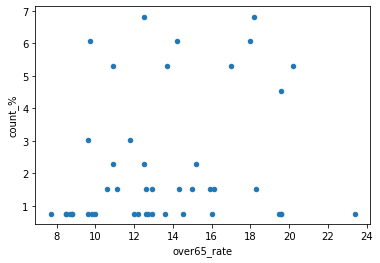

In [14]:

merged_data.plot(kind="scatter",y="count_%",x="over65_rate")

#% of complaints vs poverty rate per CD


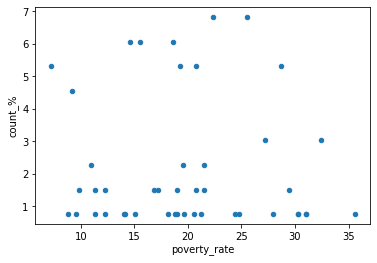

In [15]:
merged_data.plot(kind="scatter",y="count_%",x="poverty_rate")

#7 linear regression % complaints vs over_65 rate


In [21]:

y = np.array(merged_data['count_%'])
x = np.array(merged_data['over65_rate'])
x = sm.add_constant(x)
print(x)

model = sm.OLS(y, x).fit()
print(model.summary())


[[ 1.  12.2]
 [ 1.  17. ]
 [ 1.  12.9]
 [ 1.  12.9]
 [ 1.  18.3]
 [ 1.  19.6]
 [ 1.  20.2]
 [ 1.  12.5]
 [ 1.  13.6]
 [ 1.   8.5]
 [ 1.   8.5]
 [ 1.   8.8]
 [ 1.   9.6]
 [ 1.   7.7]
 [ 1.   8.8]
 [ 1.  19.6]
 [ 1.  14.5]
 [ 1.   9.7]
 [ 1.  10.9]
 [ 1.  10. ]
 [ 1.   8.7]
 [ 1.  10.9]
 [ 1.   9.8]
 [ 1.   9.6]
 [ 1.  13.7]
 [ 1.  16.1]
 [ 1.  11.8]
 [ 1.  23.4]
 [ 1.  12.5]
 [ 1.  18. ]
 [ 1.  10.6]
 [ 1.  15.2]
 [ 1.  14.2]
 [ 1.  12.6]
 [ 1.  12. ]
 [ 1.  12.6]
 [ 1.  19.6]
 [ 1.  18.2]
 [ 1.  15. ]
 [ 1.  11.1]
 [ 1.  19.5]
 [ 1.  12.7]
 [ 1.  15.9]
 [ 1.  14.3]
 [ 1.  16. ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.053
Date:                Thu, 19 Dec 2019   Prob (F-statistic):              0.159
Time:              

The regression shows a possitive correlation, but it is not significant.  that means there are not evidence of the significance that the number of people older than 65 in a CD explains the variation in the number of 311 complaints related to home deleived meals in a CD. 

In [22]:
y = np.array(merged_data['count_%'])
x = np.array(merged_data['poverty_rate'])
x = sm.add_constant(x)
print(x)

model = sm.OLS(y, x).fit()
print(model.summary())

[[ 1.   8.8]
 [ 1.  19.3]
 [ 1.  11.3]
 [ 1.  11.3]
 [ 1.   9.8]
 [ 1.   9.2]
 [ 1.   7.2]
 [ 1.  22.3]
 [ 1.  19.6]
 [ 1.  31. ]
 [ 1.  31. ]
 [ 1.  30.3]
 [ 1.  32.4]
 [ 1.  35.6]
 [ 1.  30.3]
 [ 1.  14. ]
 [ 1.  20.6]
 [ 1.  15.5]
 [ 1.  11. ]
 [ 1.  21.2]
 [ 1.  24.8]
 [ 1.  28.7]
 [ 1.   9.6]
 [ 1.  27.9]
 [ 1.  20.8]
 [ 1.  19. ]
 [ 1.  27.2]
 [ 1.  24.4]
 [ 1.  21.5]
 [ 1.  18.6]
 [ 1.  29.4]
 [ 1.  19.5]
 [ 1.  14.6]
 [ 1.  18.1]
 [ 1.  18.8]
 [ 1.  16.8]
 [ 1.  15.1]
 [ 1.  25.5]
 [ 1.  20.8]
 [ 1.  21.5]
 [ 1.  14.1]
 [ 1.  19. ]
 [ 1.  12.3]
 [ 1.  17.2]
 [ 1.  12.3]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1631
Date:                Thu, 19 Dec 2019   Prob (F-statistic):              0.688
Time:              

The regression shows a negative correlation , but it is not significant. So,  there are not evidence of significance that % of poverty in a CD explains the variation in the number of 311 complaints related to home deleived meals in a CD. 

In [0]:

import seaborn as sns

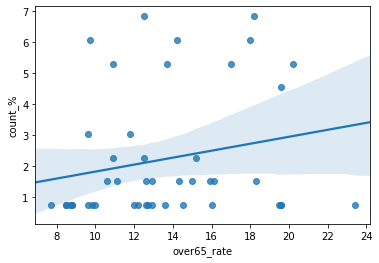

In [18]:
sns.regplot(
    x=merged_data['over65_rate'],
    y=merged_data['count_%'])

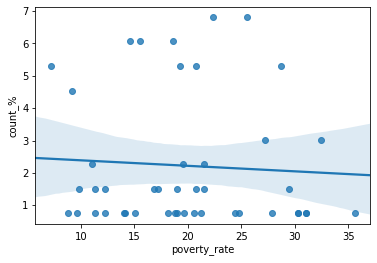

In [19]:
sns.regplot(
    x=merged_data['poverty_rate'],
    y=merged_data['count_%'])

The scatterplots and the regression outputs shows a possitive correlation between the & of seniors and the % of complaints related to home delived meal. However, this correlation is not significant. That means there are not enough evidence to prove that the variation in the complaints is explained by the variation in the % of seniors in the CD. This possitive trend is alligned to the research I am doing for my capstone. I have foud that home deliverd meal is more important as people become older than 65. 

On the other side, the scatterplots and the regression outputs shows a negative correlation between poverty rate in the CD and the change in the number of complaints related to home delived meals. However, as this correlation is not significant there is not enough evidence to demostrate this association. The negative trend is alligned to the research I am doing for my capstone, but is not alligned to what people commonly think, that poor people are the only that take the benefit and the ones that complaint the most. The scatterplot shows the majority of the complaints are in CD with 20% average poverty rate and then 10% of poverty. Instead of the ones with the highest levels of poverty. 

